Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [709]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(fname):
    with open(fname, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        newlist = list(reader)
        return newlist

enrollments = read_csv('enrollments.csv')
print(enrollments[0])

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


In [710]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_csv('daily_engagement.csv')

print(daily_engagement[0])

project_submissions = read_csv('project_submissions.csv')

print(project_submissions[0])

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [711]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [712]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [713]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [714]:
## Rename the "acct" column in the daily_engagement table to "account_key"

for engagement_row in daily_engagement: 
    engagement_row['account_key'] = engagement_row['acct']
    del engagement_row['acct']
    #{we are calling each row in daily_engagement through engagement_row. then in each row, we are putting the value next to 'acct' next to a new key 'account key'. then we're deleting 'acct' and its value in that row.} 
    # remember this is a list of dictionaries. when you go through each row, you are entering the dictionary. 
print(daily_engagement[0])


{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [715]:
def get_unique_students(data):
    unique_students = set()
    for row in data:
        unique_students.add(row['account_key'])
    return unique_students

In [716]:
## Find the total number of rows in and the number of unique students (account keys) in each table.

# Number of rows in each table
print 'The number of students in enrollments is %d' %(len(enrollments))
print 'The number of students in daily engagement is %d' %(len(daily_engagement))
print 'The number of students in project submissions is %d' %(len(project_submissions))

# Number of unique students (account keys) in each table

unique_enrolled_students = get_unique_students(enrollments)
unique_daily_engaged = get_unique_students(daily_engagement)
unique_proj_submissions = get_unique_students(project_submissions)

#for enrollment in enrollments:
    #unique_enrolled_students.add(enrollment['account_key'])
    # this is the 1st round of the for-loop: print enrollments[0]['account_key']

print 'The number of unique students in enrollments is %d' %(len(unique_enrolled_students))

#unique_daily_engaged = set()
#for engagement_record in daily_engagement:
    #unique_daily_engaged.add(engagement_record['acct'])
print 'The number of unique students in daily engagement is %d' %(len(unique_daily_engaged))

#unique_proj_submissions = set()
#for submission in project_submissions:
    #unique_proj_submissions.add(submission['account_key'])
print 'The number of unique students in project submissions is %d' %(len(unique_proj_submissions))

# WHY ARE UNIQUE STUDENT ENROLLMENTS & DAILY ENGAGEMENTS NOT MATCHING UP? 

The number of students in enrollments is 1640
The number of students in daily engagement is 136240
The number of students in project submissions is 3642
The number of unique students in enrollments is 1302
The number of unique students in daily engagement is 1237
The number of unique students in project submissions is 743


## Problems in the Data

## Missing Engagement Records

In [717]:
# CHECK OUT 1 ENROLLMENT RECORD THAT WAS MISSING FROM ENGAGEMENT  
missing_record_acctkey = []
for acctkey in unique_enrolled_students:
    if acctkey not in unique_daily_engaged:
        missing_record_acctkey = acctkey
        break
print(missing_record_acctkey)

missing_record = []
for entry in enrollments: 
    if entry['account_key'] is missing_record_acctkey:
        missing_record = entry

print(missing_record)
## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

# RESULT: JOIN DATE AND CANCEL DATE ARE ON THE SAME DAY, AND STUDENTS NEED TO HAVE AN ACCOUNT FOR A WHOLE DAY BEFORE THE ENGAGEMENT IS RECORDED.

1145
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 4, 0, 0), u'account_key': u'1145', u'cancel_date': datetime.datetime(2015, 4, 4, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [718]:
more_problem_students = list()
for enrollment in enrollments:
    if enrollment['account_key'] not in unique_daily_engaged:
        if enrollment['join_date'] != enrollment['cancel_date']:
            more_problem_students.append(enrollment)

print 'The number of problem students still there are %d' %(len(more_problem_students))

print(more_problem_students)

The number of problem students still there are 3
[{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}, {u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}, {u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}]


## Tracking Down the Remaining Problems

In [719]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [720]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [721]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [722]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments: 
    if enrollment['days_to_cancel'] is None or enrollment['days_to_cancel'] > 7:        
        if enrollment['account_key'] not in paid_students or enrollment['join_date'] > paid_students[enrollment['account_key']]:
            paid_students.update({enrollment['account_key']:enrollment['join_date']})

print(len(paid_students))

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

995


## Getting Data from First Week

In [723]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [724]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = []
for record in paid_engagement:
    acctkey = record['account_key']
    join_date = paid_students[acctkey]
    engagement_date = record['utc_date']
    if within_one_week(join_date,engagement_date):
        paid_engagement_in_first_week.append(record)
# paid_engagement_in_first_week = 
print(len(paid_engagement_in_first_week))

6919


## Exploring Student Engagement

In [725]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def sum_grouped_items(data,key_name):
    grouped_data = defaultdict(list)
    for record in data:
        key = record[key_name]
        grouped_data[key].append(record)
    return grouped_data

engagement_by_account = sum_grouped_items(paid_engagement_in_first_week, 'account_key')
# engagement_by_account = defaultdict(list)
# for engagement_record in paid_engagement_in_first_week:
#     account_key = engagement_record['account_key']
#     engagement_by_account[account_key].append(engagement_record)

In [619]:
# FUNCTION for analyzing components of engagement data & summarizing univariate stats
import numpy as np

# Create a dictionary with the total [VARIABLE OF INTEREST] each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers
def engagement_analysis(grouped_data, var_of_interest):
    total_var_by_account = {}
    for account_key, var_for_student in grouped_data.items():
        total_var = 0
        for engagement_record in var_for_student:
            total_var += engagement_record[var_of_interest]
        total_var_by_account[account_key] = total_var
    
    total_var = total_var_by_account.values()
    print 'Mean:', np.mean(total_var)
    print 'Standard deviation:', np.std(total_var)
    print 'Minimum:', np.min(total_var)
    print 'Maximum:', np.max(total_var)
    return total_var

total_minutes_visited = engagement_analysis(engagement_by_account,'total_minutes_visited')

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [538]:
# # Create a dictionary with the total minutes each student spent in the classroom during the first week.
# # The keys are account keys, and the values are numbers (total minutes)


# total_minutes_by_account = {}
# for account_key, engagement_for_student in engagement_by_account.items():
#     total_minutes = 0
#     for engagement_record in engagement_for_student:
#         total_minutes += engagement_record['total_minutes_visited']
#     total_minutes_by_account[account_key] = total_minutes

# print(len(total_minutes_by_account))

In [475]:
# import numpy as np

# # Summarize the data about minutes spent in the classroom
# total_minutes = total_minutes_by_account.values()
# print 'Mean:', np.mean(total_minutes)
# print 'Standard deviation:', np.std(total_minutes)
# print 'Minimum:', np.min(total_minutes)
# print 'Maximum:', np.max(total_minutes)

# Debugging Data Analysis Code

In [726]:
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

# I did the below print function and just used observational analysis

for row in paid_engagement_in_first_week:
    if row['account_key'] == '108':
        print row

{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 25.9137858334, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 3.40682316667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 99.1186611667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 22, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 35.8316206667, u'projects_completed': 2, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 23, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 24, 0, 0)}
{u'lessons_completed': 0, u'num_courses_

## Lessons Completed in First Week

In [727]:
## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)


# total_lessons_by_account = {}
# for account_key, lessons_for_student in engagement_by_account.items():
#     total_lessons = 0
#     for lessons_record in lessons_for_student:
#         total_lessons += lessons_record['lessons_completed']
#     total_lessons_by_account[account_key] = total_lessons

# # Summarize the data about lessons completed in the classroom
# total_lessons = total_lessons_by_account.values()
# print 'Mean:', np.mean(total_lessons)
# print 'Standard deviation:', np.std(total_lessons)
# print 'Minimum:', np.min(total_lessons)
# print 'Maximum:', np.max(total_lessons)


grouped_data = sum_grouped_items(paid_engagement_in_first_week,'account_key')
total_lessons_completed = engagement_analysis(grouped_data,'lessons_completed')


Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [728]:
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

paid_engagement_in_first_week_with_visits = paid_engagement_in_first_week[:]

for record in paid_engagement_in_first_week_with_visits:
    if record['num_courses_visited'] > 0:
        record['has_visited'] = 1
    else: 
        record['has_visited'] = 0
    
print(len(paid_engagement_in_first_week_with_visits))

visits_by_account = sum_grouped_items(paid_engagement_in_first_week_with_visits,'account_key')
total_visits_made = engagement_analysis(visits_by_account, 'has_visited')

6919
Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [549]:
# create a list of unique account ids from the submissions report; 
# Note: this includes ALL students, NOT just first week, though test accounts have been removed

In [729]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

# print(type(non_udacity_submissions)) RESULTS IN 'list'

# get IDs of all the passed students first & update unique account list

passed_students = set()
for submission in paid_submissions: 
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        passed_students.add(submission['account_key'])

print(len(passed_students))

647


In [730]:
# USE ACCOUNT IDS TO PULL OUT ENROLLMENT INFORMATION 

passing_engagement = []
non_passing_engagement = []
for engagement in paid_engagement_in_first_week_with_visits: 
    if engagement['account_key'] in passed_students:       
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [731]:
## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# Minutes spent in the classroom 

grouped_data = sum_grouped_items(passing_engagement,'account_key')
print('Passed students, total minutes visited:')
passing_total_minutes = engagement_analysis(grouped_data,'total_minutes_visited')
print('Passed students, total lessons completed:')
passing_total_lessons = engagement_analysis(grouped_data,'lessons_completed')
print('Passed students, total days visited:')
passing_total_days = engagement_analysis(grouped_data,'has_visited')


grouped_data = sum_grouped_items(non_passing_engagement,'account_key')
print('Failed students, total minutes visited:')
failed_total_minutes = engagement_analysis(grouped_data,'total_minutes_visited')
print('Failed students, total lessons completed:')
failed_total_lessons = engagement_analysis(grouped_data, 'lessons_completed')
print('Failed students, total days visited:')
failed_total_days = engagement_analysis(grouped_data, 'has_visited')

# POTENTIAL QUESTIONS FOR EXPLORING IN THE FUTURE: 
## Are these students more likely to go onto other projects? 
## Are there certain projects failed students are more likely to pass than passing students? 
## Excluding those who cancel, are failed students going to put in more time (more minutes spent) than non-failed students during week 2? 


Passed students, total minutes visited:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Passed students, total lessons completed:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Passed students, total days visited:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Failed students, total minutes visited:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
Failed students, total lessons completed:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
Failed students, total days visited:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

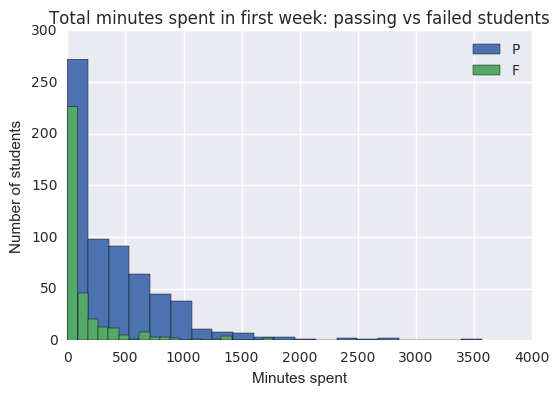

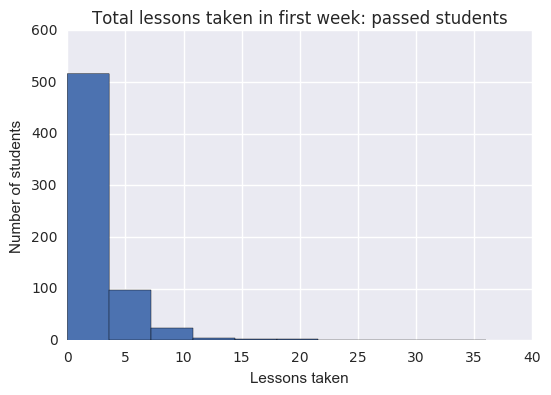

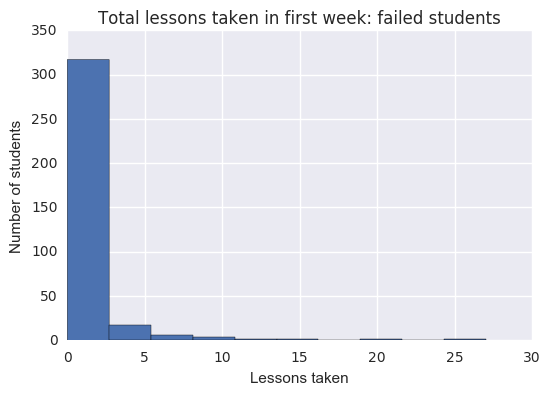

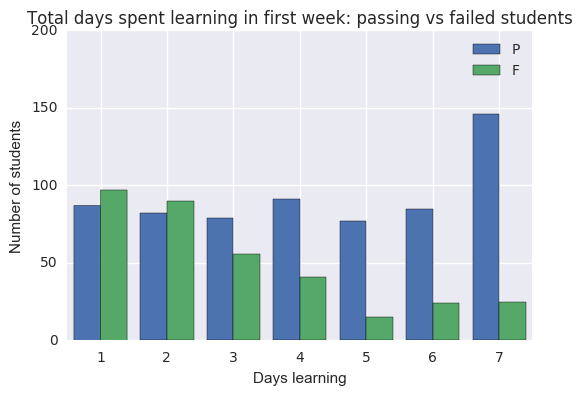

In [732]:
## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(passing_total_minutes,bins=20)
plt.hist(failed_total_minutes,bins=20)
plt.title('Total minutes spent in first week: passing vs failed students')
plt.xlabel('Minutes spent')
plt.ylabel('Number of students')
plt.legend('PF')
plt.show()

plt.hist(passing_total_lessons,bins=10)
plt.title('Total lessons taken in first week: passed students')
plt.xlabel('Lessons taken')
plt.ylabel('Number of students')
plt.show()

plt.hist(failed_total_lessons,bins=10)
plt.title('Total lessons taken in first week: failed students')
plt.xlabel('Lessons taken')
plt.ylabel('Number of students')
plt.show()

plt.hist([passing_total_days, failed_total_days],bins=7,align='right')
plt.ylim(0, 200)
plt.xlim(0.5,7.5)
plt.title('Total days spent learning in first week: passing vs failed students')
plt.xlabel('Days learning')
plt.ylabel('Number of students')
plt.legend('PF')
plt.show()

## Improving Plots and Sharing Findings

#### SEE ABOVE!!!
- Imported seaborn library, added axis labels, title, legend, bins, xlim/ylim
- Results:  
    - The mean # of minutes spent in Udacity among passing students is significantly higher than failing students
    - Same for total # of lessons being participated in
    - There is a range of passing AND failing students that spend anywhere between 1-7 days during their first week on Udacity. However, the number of passing students spending 1-6 days has a roughly uniform distribution whereas for failing students, there are far fewer spending more than 2 days (right-skewed). 
    - Also for passing students, the highest number spend 7 days during the first week whereas that is one of the smallest bins for failing students. 
    - Note: we cannot say that spending more time on Udacity, taking more lessons, or going on Udacity every day CAUSES students to pass because there was no A/B testing or experimental analysis done. There are external factors such as level of interest and background knowledge that may impact how a student performs and would not be improved by increasing any of those three factors. 